In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from utils import graph, draw_path
import math
from queue import PriorityQueue

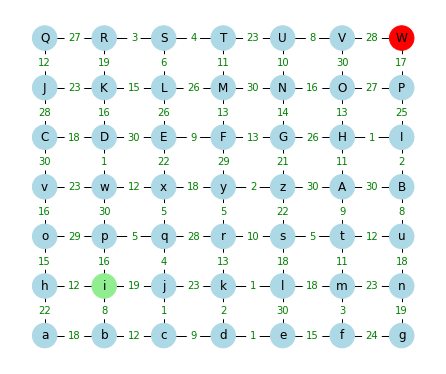

In [67]:
np.random.seed(827365)

G, pos, color = graph('i', 'W')

plt.figure(figsize=(6,5))
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos=pos, 
        node_color=color, 
        with_labels=True,
        node_size=600)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, rotate=False, font_color='green');

In [68]:
def dijkstra(graph: nx.classes.graph.Graph, start, end):

    def backtrace(prev, start, end):
        node = end
        path = []
        while node != start:
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        return path
    
    def cost(u, v):
        return graph.get_edge_data(u,v).get('weight')

    prev = {}
    dist = {v: math.inf for v in G.nodes}
    visited = set()
    pq = PriorityQueue()

    dist[start] = 0
    pq.put((dist[start], start))

    while not pq.empty():
        curr_cost, curr_n = pq.get()
        visited.add(curr_n)
        for neighbor in G.neighbors(curr_n):
            # if we found a shorter path 
            path = dist[curr_n] + cost(curr_n, neighbor)
            if path < dist[neighbor]:
                # update distance, we found a shorter one.
                dist[neighbor] = path
                prev[neighbor] = curr_n
                if neighbor not in visited:
                    visited.add(neighbor)
                    pq.put((dist[neighbor], neighbor))
                else:
                    pq.get((dist[neighbor], neighbor))
                    pq.put((dist[neighbor], neighbor))
            if path == dist[neighbor]:
                pq.put((path, neighbor))


    return backtrace(prev, start, end), dist[end], visited   

In [69]:
path, cost, visited = dijkstra(G, 'i', 'W')

In [70]:
print(path, cost)
print(nx.dijkstra_path_length(G, 'i', 'W'))
nx.dijkstra_path(G, 'i', 'W')

['i', 'b', 'c', 'd', 'k', 'l', 's', 't', 'A', 'H', 'I', 'P', 'W'] 118
118


['i', 'b', 'c', 'd', 'k', 'l', 's', 't', 'A', 'H', 'I', 'P', 'W']

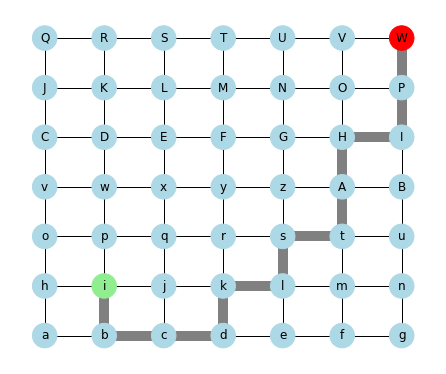

In [71]:
draw_path(G, pos, path, color)

In [45]:
len(visited)

49

In [49]:
a_star = nx.astar_path(G, 'i', 'W')
a_start_cost = nx.astar_path_length(G, 'i', 'W')
nx.dijkstra_path_length(G, 'i', 'W')
zxc = nx.dijkstra_path(G, 'i', 'W')

In [55]:
a_star, a_start_cost

(['i', 'p', 'q', 'x', 'E', 'F', 'M', 'T', 'U', 'V', 'W'], 42)

In [56]:
import time
start = time.time()
nx.dijkstra_path(G, 'i', 'W')
print(time.time() - start)


start = time.time()
nx.astar_path(G, 'i', 'W')
print(time.time() - start)

0.00022149085998535156
0.0002613067626953125


In [72]:
A = nx.grid_2d_graph(500, 500)

In [73]:
for (u, v) in A.edges():
        A.edges[u,v]['weight'] = np.random.randint(1,500)

In [74]:
import time
start = time.time()
x = nx.dijkstra_path(A, (0,0), (480, 480))
print("Dijkstra's Algorithm: ", time.time() - start)


start = time.time()
y = nx.astar_path(A, (0,0), (480, 480))
print("A* Search Algorithm: ", time.time() - start)

Dijkstra's Algorithm:  9.009647130966187
A* Search Algorithm:  1.5710430145263672
